In [1]:
# import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size = 1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

75.73879966605497 -82.45637797238365
75.61009269194224 69.4277607177608
-23.282917883364647 179.73129649410401
28.711868177052168 81.89078262336545
-37.3872605754034 165.2892292005244
77.90672983897483 -140.45343432611043
-31.968553357830032 149.86851755973544
2.5006860095007823 82.89836489095603
-15.53063041916971 115.96542749915693
-30.230297447127832 178.74264466930111
-30.184071741022564 -56.45789460866523
-72.60253298631608 46.59113993899214
71.14975604273175 -126.43425712675261
56.700284471368064 45.783860346159685
-74.11272417368097 76.40619127360861
-23.41236546653927 125.4681995675636
57.444463260988414 -67.84436107115036
-18.949694312376707 -3.8407472034791112
73.0912130414871 -130.51139261718987
3.217527134445291 -168.8600541111605
7.485965799737357 117.65257023051123
29.778474691629725 -37.732014311371785
88.76851451802276 -109.81778343034121
16.454614599949267 -13.733649480581306
-52.51569308219179 10.350979195780525
-13.316252379889846 33.282777382484625
50.44014574089368

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    

640

In [7]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime libaray 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | jumla
Processing Record 5 of Set 1 | westport
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | mudgee
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | russell
Processing Record 11 of Set 1 | quarai
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | voskresenskoye
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | balabac
Processing Record 22 of Set 1 | ribeira grande
Processi

Processing Record 38 of Set 4 | zachepylivka
Processing Record 39 of Set 4 | minas novas
Processing Record 40 of Set 4 | toliary
City not found. Skipping...
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | chapais
Processing Record 43 of Set 4 | canaries
Processing Record 44 of Set 4 | hirara
Processing Record 45 of Set 4 | polunochnoye
Processing Record 46 of Set 4 | severnyy-kospashskiy
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | atar
Processing Record 49 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 50 of Set 4 | atuona
Processing Record 1 of Set 5 | maryville
Processing Record 2 of Set 5 | molchanovo
Processing Record 3 of Set 5 | guadalupe
Processing Record 4 of Set 5 | khairpur nathan shah
Processing Record 5 of Set 5 | oranjestad
Processing Record 6 of Set 5 | mayna
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | peniche
Processing Record 9 of Set 5 | ust-maya
Processing Record 1

Processing Record 27 of Set 8 | huarmey
Processing Record 28 of Set 8 | kargil
Processing Record 29 of Set 8 | karachi
Processing Record 30 of Set 8 | hohhot
Processing Record 31 of Set 8 | esna
Processing Record 32 of Set 8 | corinto
Processing Record 33 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | sao benedito do rio preto
Processing Record 36 of Set 8 | pitimbu
Processing Record 37 of Set 8 | aberdeen
Processing Record 38 of Set 8 | bandarbeyla
Processing Record 39 of Set 8 | monte carmelo
Processing Record 40 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 8 | mnogovershinnyy
Processing Record 42 of Set 8 | concarneau
Processing Record 43 of Set 8 | kutum
Processing Record 44 of Set 8 | huainan
Processing Record 45 of Set 8 | oriximina
Processing Record 46 of Set 8 | grand gaube
Processing Record 47 of Set 8 | mahibadhoo
Processing Record 48 of Set 8 | nanortalik
Processing Record 49 of Set 8 | sobolevo


Processing Record 14 of Set 12 | eldikan
City not found. Skipping...
Processing Record 15 of Set 12 | chicama
Processing Record 16 of Set 12 | dax
Processing Record 17 of Set 12 | tourlaville
Processing Record 18 of Set 12 | camana
Processing Record 19 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 20 of Set 12 | upington
Processing Record 21 of Set 12 | awjilah
Processing Record 22 of Set 12 | samarai
Processing Record 23 of Set 12 | radhanpur
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | dawson creek
Processing Record 26 of Set 12 | itarema
Processing Record 27 of Set 12 | sinnamary
Processing Record 28 of Set 12 | gazni
City not found. Skipping...
Processing Record 29 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 30 of Set 12 | babol
Processing Record 31 of Set 12 | vanderhoof
Processing Record 32 of Set 12 | belyy yar
Processing Record 33 of Set 12 | mrirt
City not found. Skipping...
Processing Record 34 of Set 1

In [76]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,29.61,91,94,1.10,GL,2022-06-07 13:27:31
1,Yar-Sale,66.8333,70.8333,67.53,27,58,12.41,RU,2022-06-07 13:27:31
2,Isangel,-19.5500,169.2667,73.17,82,15,8.16,VU,2022-06-07 13:27:32
3,Jumla,29.2747,82.1838,70.21,43,91,5.01,NP,2022-06-07 13:27:32
4,Westport,41.1415,-73.3579,73.72,70,100,1.99,US,2022-06-07 13:22:44
5,Aklavik,68.2191,-135.0107,33.21,77,28,11.05,CA,2022-06-07 13:27:33
6,Mudgee,-32.5943,149.5871,42.62,88,31,10.31,AU,2022-06-07 13:27:33
7,Hambantota,6.1241,81.1185,82.74,83,20,11.50,LK,2022-06-07 13:27:33
8,Karratha,-20.7377,116.8463,72.46,57,6,8.39,AU,2022-06-07 13:25:31
9,Russell,32.3502,-85.1999,74.48,94,100,4.61,US,2022-06-07 13:27:34


In [88]:
# Create new order of the columns
city_data_df =city_data_df.reindex(columns= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"])
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-06-07 13:27:31,77.4840,-69.3632,29.61,91,94,1.10
1,Yar-Sale,RU,2022-06-07 13:27:31,66.8333,70.8333,67.53,27,58,12.41
2,Isangel,VU,2022-06-07 13:27:32,-19.5500,169.2667,73.17,82,15,8.16
3,Jumla,NP,2022-06-07 13:27:32,29.2747,82.1838,70.21,43,91,5.01
4,Westport,US,2022-06-07 13:22:44,41.1415,-73.3579,73.72,70,100,1.99


In [89]:
# Create the output file (CSV).new_file = "folder_name/file_name". Need to create folder name first
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-06-07 13:27:31,77.4840,-69.3632,29.61,91,94,1.10
1,Yar-Sale,RU,2022-06-07 13:27:31,66.8333,70.8333,67.53,27,58,12.41
2,Isangel,VU,2022-06-07 13:27:32,-19.5500,169.2667,73.17,82,15,8.16
3,Jumla,NP,2022-06-07 13:27:32,29.2747,82.1838,70.21,43,91,5.01
4,Westport,US,2022-06-07 13:22:44,41.1415,-73.3579,73.72,70,100,1.99
...,...,...,...,...,...,...,...,...,...
577,Tomatlan,MX,2022-06-07 13:43:28,19.9333,-105.2500,76.80,74,91,1.61
578,Baijiantan,CN,2022-06-07 13:43:28,45.6333,85.1833,83.44,16,0,14.00
579,Vardo,NO,2022-06-07 13:43:29,70.3705,31.1107,44.58,76,100,3.44
580,Isla Mujeres,MX,2022-06-07 13:43:29,21.2311,-86.7310,82.17,82,80,12.48


In [90]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

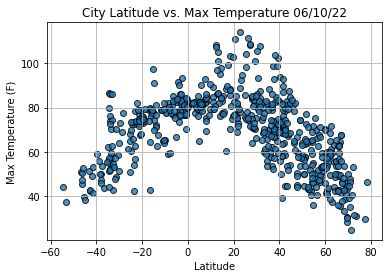

In [91]:
# Import the module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


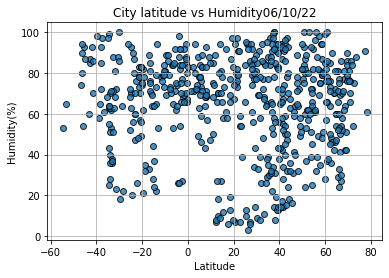

In [92]:
# Build the scatter plots for latitude vs.humidity
plt.scatter(lats,
            humidity,
           edgecolor = "black",linewidth=1,marker="o",
           alpha=0.8, label = "Cities")

#Incorporate the other graph properties
plt.title(f"City latitude vs Humidity" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
#save the figure

plt.savefig("weather_data/Fig2.png")
# Show plot
plt.show()

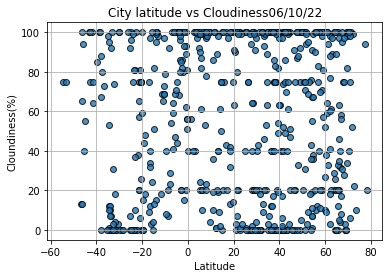

In [93]:
# Build the scatter plots for latitude vs.humidity
plt.scatter(lats,
            cloudiness,
           edgecolor = "black",linewidth=1,marker="o",
           alpha=0.8, label = "Cities")

#Incorporate the other graph properties
plt.title(f"City latitude vs Cloudiness" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloundiness(%)")
plt.grid(True)
#save the figure

plt.savefig("weather_data/Fig3.png")
# Show plot
plt.show()

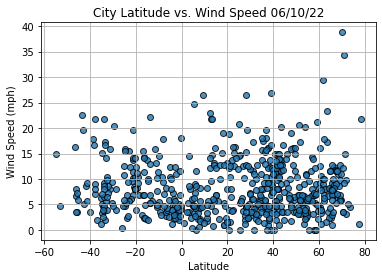

In [94]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [95]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
     
    line_eq = "y =" + str(round(slope,2))* "x +" + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,y_values, "r")
    
    # Annotate the text for the line equation.
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()


In [96]:
# Use loc to call out the row's data: row = df.loc[row_index]
index13 = city_data_df.loc[13]
index13

City               Voskresenskoye
Country                        RU
Date          2022-06-07 13:27:35
Lat                       56.8381
Lng                       45.4317
Max Temp                    62.53
Humidity                       49
Cloudiness                     83
Wind Speed                  14.29
Name: 13, dtype: object

In [86]:
# Filter a DataFrom based on a value of a row
city_data_df["Lat"]>=0


0       True
1       True
2      False
3       True
4       True
       ...  
577     True
578     True
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [101]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-06-07 13:27:31,77.4840,-69.3632,29.61,91,94,1.10
1,Yar-Sale,RU,2022-06-07 13:27:31,66.8333,70.8333,67.53,27,58,12.41
3,Jumla,NP,2022-06-07 13:27:32,29.2747,82.1838,70.21,43,91,5.01
4,Westport,US,2022-06-07 13:22:44,41.1415,-73.3579,73.72,70,100,1.99
5,Aklavik,CA,2022-06-07 13:27:33,68.2191,-135.0107,33.21,77,28,11.05


In [ ]:
# Create Mprtjerm and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

In [ ]:
# Liner regression on the Northern Hemisphere
x_values = city_data_df["Lat"]
y_values = city_data_df ["Max Temp"]

# Call the function



